In [1]:
import os
import sys
import tarfile
import gif
import numpy as np
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_settings_v3 import *
from dismantling import get_index_list
from planar import create_proximity_graph, distance
from auxiliary import get_base_network_name, load_delta_data

fig_dir = '../draft/figs'
param = 'param'

attack_dict = {
    'Ran': r'$\mathrm{Rnd}$', 'Deg': r'$\mathrm{ID}$', 'DegU': r'$\mathrm{RD}$',
    'Btw': r'$\mathrm{IB}$', 'BtwU': r'$\mathrm{RB}$', 
    'Eigenvector': r'$\mathrm{IE}$', 'EigenvectorU': r'$\mathrm{RE}$',
    'CI': r'$\mathrm{ICI}$', 'CIU': r'$\mathrm{RCI}$', 'CIU2': r'$\mathrm{RCI2}$',
}

In [ ]:
L = 32
N = L*L
attack = 'BtwU'

size = {
    'Lattice': L,
    'DT': N
}
network = 'Lattice'
network = 'DT'
seed = 0

In [ ]:
def plot(g, th, position):
    
    attack_order = g['attack_order']
    g.delete_vertices(attack_order[:th])

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    label_dict = dict((i, n) for i,n in enumerate(number))
    
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-2, L+2)
    plt.ylim(-2, L+2)
    
    if L <= 32:
        s = 40
    if L == 64:
        s = 15
    if L == 128:
        s = 5
    for oi in attack_order[:th]:
        plt.scatter(*position[oi], color='k', s=2*s, zorder=10)
        
    for oi in attack_order[th:]:
        idx = g.vs['oi'].index(oi)
        plt.scatter(*position[oi], color=colors[label_dict[membership[idx]]], s=s, zorder=0)
        

g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
position = g.vs['position']
th = max_pos+1
plot(g, th, position)
fig_name = os.path.join(fig_dir, 'breaking_nodes_L{}_{}'.format(L, attack))
dpi = 100
plt.savefig(fig_name + '.png', dpi=dpi)
plt.savefig(fig_name + '.pdf', dpi=dpi)
plt.show()

In [26]:
verbose = False

size = 128

data = []
min_seed = 0
max_seed = 10
for seed in range(min_seed, max_seed):
    if verbose:
        print(seed)
    g, max_pos, delta_max = load_data(network, size, param, attack, seed)    

    attack_order = g['attack_order']
    to_delete = set(g.vs['oi']).difference(set(attack_order[:max_pos+1]))
    g.delete_vertices(to_delete)

    components = g.components(mode='WEAK')
    gcc = components.giant()

    comp_sizes = sorted([len(c) for c in components], reverse=True)
    
    if len(comp_sizes) == 1:
        comp_sizes.append(0)

    N_gcc = comp_sizes[0]
    N_sec = comp_sizes[1]
    comp_sizes.remove(N_gcc)
    comp_sizes = np.array(comp_sizes)
    if np.sum(comp_sizes) == 0:
        meanS = np.NaN
    else:
        meanS = np.sum(comp_sizes**2) / np.sum(comp_sizes)

    data.append([N_gcc, N_sec, meanS])
data = np.array(data)    
print(data)

[[10.   1.   1. ]
 [10.   0.   nan]
 [13.   1.   1. ]
 [10.   0.   nan]
 [10.   1.   1. ]
 [10.   1.   1. ]
 [11.   1.   1. ]
 [10.   1.   1. ]
 [ 9.   0.   nan]
 [12.   2.   1.4]]


In [11]:
@gif.frame
def plot(g, th, position):
    
    attack_order = g['attack_order']
    g.delete_vertices(attack_order[:th])

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    label_dict = dict((i, n) for i,n in enumerate(number))
    
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-1, L)
    plt.ylim(-1, L)
    
    if L <= 32:
        s = 40
    if L == 64:
        s = 15
    if L == 128:
        s = 9
    for oi in attack_order[:th]:
        plt.scatter(*position[oi], color='k', s=s)
        
    for oi in attack_order[th:]:
        idx = g.vs['oi'].index(oi)
        plt.scatter(*position[oi], color=colors[label_dict[membership[idx]]], s=s)
        
frames = []
th = 0
while True:
    
    g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
    position = g.vs['position']
    frame = plot(g, th, position)
    frames.append(frame)
    
    print(th, max_pos)
    if th == max_pos + 1:
        frames += [frame] * 10
        break
    th += 1
    
gif.save(frames, '{}_L{}_seed{:05}.gif'.format(network, L, seed), duration=100)
print('Finish')

0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 15
16 15
Finish


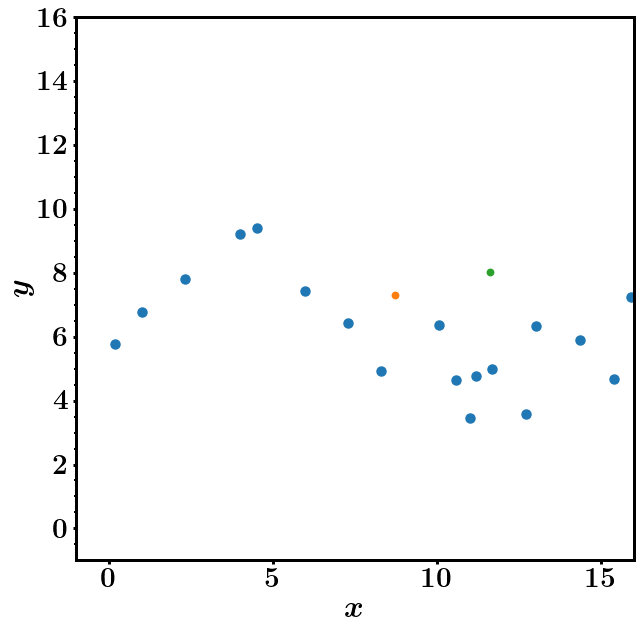

In [31]:
g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)

attack_order = g['attack_order']
position = g.vs['position']
to_delete = set(g.vs['oi']).difference(set(attack_order[:max_pos+1]))
g.delete_vertices(to_delete)

components = g.components(mode='WEAK')
gcc = components.giant()
membership = np.array(components.membership)
number, count = np.unique(membership, return_counts=True)
number = number[np.argsort(count)[::-1]] 
label_dict = dict((i, n) for i,n in enumerate(number))

plt.figure(figsize=(10,10))

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xticks = range(L)
plt.yticks = range(L)   
plt.xlim(-1, L)
plt.ylim(-1, L)

if L <= 32:
    s = 40
if L == 64:
    s = 15

for oi in attack_order[:max_pos+1]:
    idx = g.vs['oi'].index(oi)
    if label_dict[membership[idx]] == 0:
        _s = 2*s
    else:
        _s = s
    
    if label_dict[membership[idx]] >= len(colors):
        color = 'grey'
    else:
        color=colors[label_dict[membership[idx]]]
    plt.scatter(*position[oi], color=color, s=_s)

In [ ]:
@gif.frame
def plot(g, th, position):
    
    attack_order = g['attack_order']
    to_delete = set(g.vs['oi']).difference(set(attack_order[:max_pos+1]))
    g.delete_vertices(to_delete)

    components = g.components(mode='WEAK')
    gcc = components.giant()
    membership = np.array(components.membership)
    number, count = np.unique(membership, return_counts=True)
    number = number[np.argsort(count)[::-1]] 
    label_dict = dict((i, n) for i,n in enumerate(number))
    
    
    plt.figure(figsize=(10,10))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.xticks = range(L)
    plt.yticks = range(L)   
    plt.xlim(-1, L)
    plt.ylim(-1, L)
    
    if L <= 32:
        s = 40
    if L == 64:
        s = 15
    if L == 128:
        s = 10
        
    for oi in attack_order[:th]:
        idx = g.vs['oi'].index(oi)
        if label_dict[membership[idx]] == 0:
            _s = 2*s
        else:
            _s = s

        if label_dict[membership[idx]] >= len(colors):
            color = 'grey'
        else:
            color=colors[label_dict[membership[idx]]]
        plt.scatter(*position[oi], color=color, s=_s)

frames = []
th = 0
while True:
    
    g, max_pos, delta_max = load_delta_data(network, size[network], param, attack, seed)    
    position = g.vs['position']
    frame = plot(g, th, position)
    frames.append(frame)
    
    print(th, max_pos)
    if th == max_pos + 1:
        frames += [frame] * 10
        break
    th += 1
    
gif.save(frames, 'removed_{}_L{}_seed{:05}.gif'.format(network, L, seed), duration=100)
print('Finish')